In [1]:
import pandas as pd
import numpy as np

import os
from os.path import isfile, join
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "green", "purple", 
                                                    "orange", "royalblue", "limegreen", 
                                                    "blueviolet","darkorange", "tomato"])

# Comparing experimental and simulation data

In this script, I will merge the experimental data and the brownian dynamics results to compare both.

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Experiments"

In [3]:
exp = pd.read_csv(join(data_directory,'Cairo_experimental_data-N=30.dat'), sep = "\t", index_col = [0,1])
sim = pd.read_csv(join(data_directory,'Cairo_simulation_data-N=50.dat'), sep = "\t", index_col = [0,1])

In [4]:
def field(row):
    if row['time'] < 2000:
        value = row['time']*25/2000
    else:
        value = 25
    return value

In [5]:
sim['mT'] = sim.apply (lambda row: field(row) , axis=1)

In [6]:
exp['mT_2'] = exp['mT']/0.4

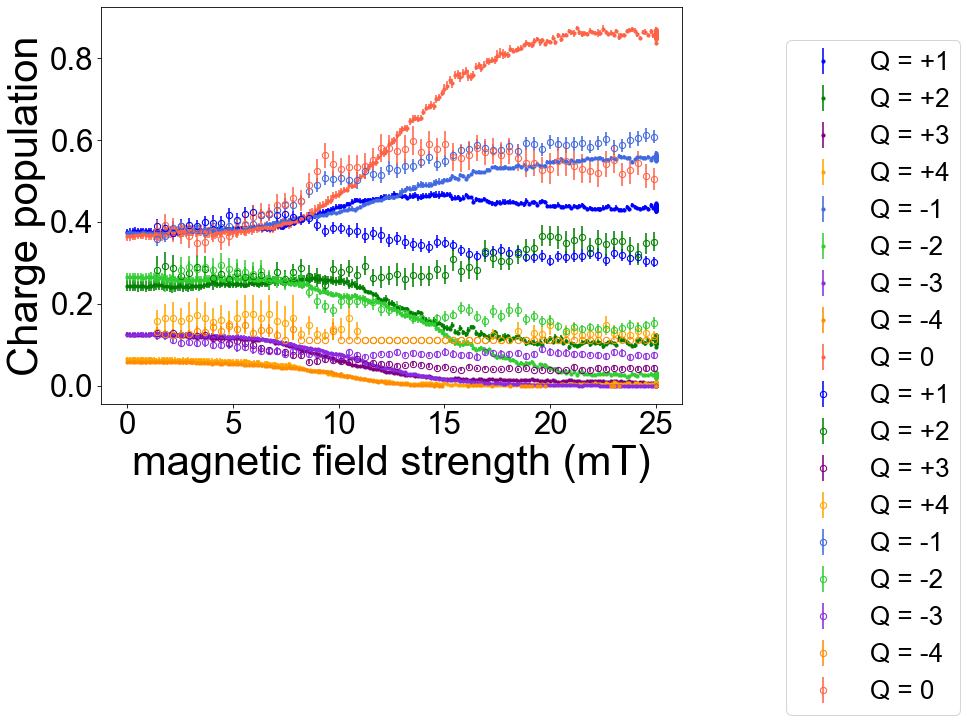

In [7]:
fig, ax1 = plt.subplots(figsize=(10,7))

#ax2 = ax1.twinx()



for typ_m, mtype in sim.groupby(level = 1):
    
    ax1.errorbar(mtype['mT'], mtype["fraction"],yerr = mtype["err"], fmt ='.', label = typ_m)


for typ_m, mtype in exp.groupby(level = 1):
    
    ax1.errorbar(mtype['mT_2'], mtype["fraction"],yerr = mtype["err"], fmt ='o',fillstyle = 'none', label = typ_m)
    
ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

ax1.legend(fontsize = 25, bbox_to_anchor=(1.5, 0.95))
ax1.set_xlabel('magnetic field strength (mT)', size = 40)
ax1.set_ylabel('Charge population', size = 40)

#ax2.plot([0,2000,2500],[0,25,25],':', color = 'black', alpha = 0.5, lw = 5)


#ax2.set_ylabel('B (mT)', size = 40)
#ax2.tick_params(axis='y', labelsize=30)


plt.show()

Separate data depending on lattice coordination

In [8]:
exp_coord3 = exp.query('coordination == 3')
exp_coord4 = exp.query('coordination == 4')
sim_coord4 = sim.query('coordination == 4')
sim_coord3 = sim.query('coordination == 3')

In [32]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "navy", "tomato", 
                                                    "red", "plum"])

Q = +2
Q = +4
Q = -2
Q = -4
Q = 0
Q = +2
Q = +4
Q = -2
Q = -4
Q = 0


Text(0, 0.5, '$\\phi$')

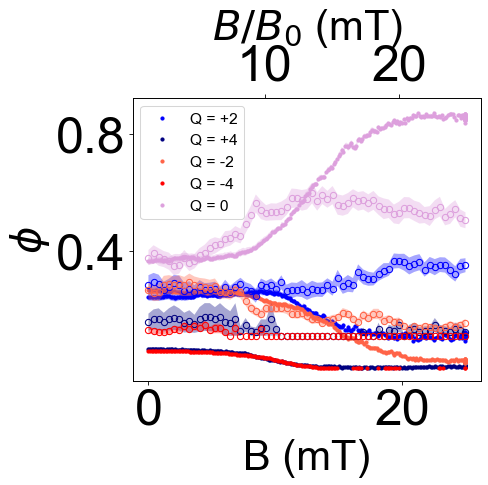

In [38]:
fig, ax = plt.subplots(1, 1,figsize=(6,5))

axes2 = ax.twiny()



for typ_m, mtype in exp_coord4.groupby(level = 1):
    print(typ_m)
    axes2.errorbar(mtype['mT_2'], mtype["fraction"],fmt = 'o',fillstyle = 'none')
    axes2.fill_between(mtype['mT_2'], mtype["fraction"]- mtype["err"], mtype["fraction"] + mtype["err"], alpha=0.35)

for typ_m, mtype in sim_coord4.groupby(level = 1):
    print(typ_m)
    ax.errorbar(mtype['mT'], mtype["fraction"],fmt = '.',label = typ_m)
    ax.fill_between(mtype['mT'], mtype["fraction"]- mtype["err"], mtype["fraction"] + mtype["err"], alpha=0.35)    

ax.tick_params(axis='y', labelsize=48)
ax.set_yticks([0.4,0.8])
ax.tick_params(axis='x', labelsize=48)  
axes2.tick_params(axis='y', labelsize=48)
axes2.set_yticks([0.4,0.8])
axes2.tick_params(axis='x', labelsize=48)  
#ax[0].set_xlim(0,10)

axes2.set_xlabel(r'$B/B_{0}$ (mT)', size = 40)
axes2.tick_params(axis='x', labelsize=48) 

ax.legend(fontsize = 15)
ax.set_xlabel(r'B (mT)', size = 40)
ax.set_ylabel(r'$\phi$', size = 40)

In [11]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "navy", "tomato", 
                                                    "red"])

Q = +1
Q = +3
Q = -1
Q = -3
Q = +1
Q = +3
Q = -1
Q = -3


Text(0, 0.5, '$\\phi$')

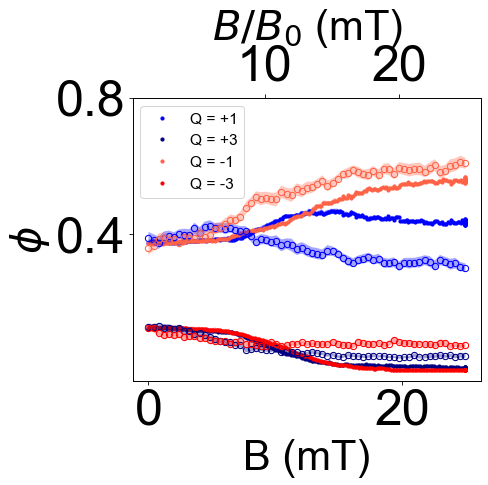

In [37]:
fig, ax = plt.subplots(1, 1,figsize=(6,5))

axes2 = ax.twiny()


for typ_m, mtype in sim_coord3.groupby(level = 1):
    print(typ_m)
    ax.errorbar(mtype['mT'], mtype["fraction"],fmt = '.',label = typ_m)
    ax.fill_between(mtype['mT'], mtype["fraction"]- mtype["err"], mtype["fraction"] + mtype["err"], alpha=0.35)

for typ_m, mtype in exp_coord3.groupby(level = 1):
    print(typ_m)
    axes2.errorbar(mtype['mT_2'], mtype["fraction"],fmt = 'o',fillstyle = 'none')
    axes2.fill_between(mtype['mT_2'], mtype["fraction"]- mtype["err"], mtype["fraction"] + mtype["err"], alpha=0.35)
    

ax.tick_params(axis='y', labelsize=48)
ax.set_yticks([0.4,0.8])
ax.tick_params(axis='x', labelsize=48)  
axes2.tick_params(axis='y', labelsize=48)
axes2.set_yticks([0.4,0.8])
axes2.tick_params(axis='x', labelsize=48)  
#ax[0].set_xlim(0,10)

axes2.set_xlabel(r'$B/B_{0}$ (mT)', size = 40)
axes2.tick_params(axis='x', labelsize=48) 

ax.legend(fontsize = 15)
ax.set_xlabel(r'B (mT)', size = 40)
ax.set_ylabel(r'$\phi$', size = 40)

In [39]:
exp_coord4.to_csv('exp_coord4.dat',sep = '\t')
exp_coord3.to_csv('exp_coord3.dat',sep = '\t')
sim_coord4.to_csv('sim_coord4.dat',sep = '\t')
sim_coord3.to_csv('sim_coord3.dat',sep = '\t')